In [1]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install top2vec==1.0.16
!pip install tensorflow tensorflow_hub tensorflow_text
!pip install 'top2vec[sentence_encoders]'
!pip install 'top2vec[sentence_transformers]'
!pip install 'top2vec[indexing]'
!pip install --upgrade tbb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.1 MB/s 
     |████████████████████████████████| 88 kB 8.8 MB/s 
     |████████████████████████████████| 5.2 MB 63.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=bfe815e149d6ac85c9a31dcda817ce1f508df5aaaceed91d08678332c3527a62
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2342149 sha256=06e6b8a28b378f3cdceaedbfb219555e02f6705a85814079247813e10cf637cd
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-no

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from top2vec import Top2Vec

In [5]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import string
string.punctuation 
print (string.punctuation) 
stop_words = stopwords.words('english')
# -*- coding: utf-8 -*-
punctuation = [ c for c in string.punctuation ] + [u'\u201c',u'\u201d',u'\u2018',u'\u2019']
import re
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/data/all_tweets_by_year/20_21_all_tweets.csv')

In [8]:
df

,Unnamed: 0,Datetime,Tweet Id,Text
0,0,2021-07-27 23:45:06+00:00,1420168400861548546,Capitol cop slams table at Jan 6 hearing as te...
1,1,2021-07-27 23:45:06+00:00,1420168399150329862,Sales of alcohol and cigarettes plunged by THR...
2,2,2021-07-27 23:40:42+00:00,1420167291103289347,Serial killer Dennis Nilsen’s sick recordings ...
3,3,2021-07-27 23:39:00+00:00,1420166863003205632,"Patsy Palmer, 49, stuns in jaw-dropping bikini..."
4,4,2021-07-27 23:39:00+00:00,1420166862889897985,"Actor and son of the late Danny Aiello Sr, Ric..."
...,...,...,...,...
357580,357580,2020-07-28 00:15:09+00:00,1287904389328502784,Finding Freedom is Amazon UK's No. 1 bestselle...
357581,357581,2020-07-28 00:02:34+00:00,1287901224491155462,Boris Johnson to unveil full obesity plan – in...
357582,357582,2020-07-28 00:01:04+00:00,1287900845569433606,Germany sets up COVID-19 testing centres at ai...
357583,357583,2020-07-28 00:00:11+00:00,1287900624114384896,Barrister's son is jailed for seven years for ...


In [9]:
def remove_punc(text):
    txt=text
    for punc in punctuation:
        txt = txt.replace(punc, " ")
    txt = txt.lower()
    return txt 

def remove_URL_and_HTML(row):
    row = re.sub(r'https.*$', "", row)
    return row

def remove_stopwords(row):
    row = word_tokenize(row)
    return ' '.join(w for w in row if not w in stop_words)

def lemmatize(row):
    lemmatizer = WordNetLemmatizer()
    row = [lemmatizer.lemmatize(word) for word in row.split()]
    return ' '.join(row)

def preprocessing(col):
    col = col.astype(str)
    punctuation_list = col.apply(remove_punc)
    URL = punctuation_list.apply(remove_URL_and_HTML)
    lem = URL.apply(lemmatize)
    word_tokens = lem.apply(remove_stopwords) 
    return word_tokens

In [10]:
list_of_xtra_stop_words = ['Djokovic', 'http' ]
stop_words.extend(list_of_xtra_stop_words)

In [11]:
df['preprocessed'] = preprocessing(df['Text'])

In [12]:
data_df_no_stopwords = df.drop_duplicates(subset='preprocessed', keep="first")

In [13]:
list_tweets = [str(i) for i in data_df_no_stopwords['preprocessed']]

In [14]:
%%time 
model = Top2Vec(list_tweets, workers=-2, speed='fast-learn', min_count=100, embedding_model='universal-sentence-encoder')

2022-06-12 13:57:11,752 - top2vec - INFO - Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-06-12 13:57:19,199 - top2vec - INFO - Downloading universal-sentence-encoder model
2022-06-12 13:57:45,503 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-06-12 13:57:59,354 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  war

CPU times: user 10min 42s, sys: 38.1 s, total: 11min 20s
Wall time: 4min 4s


In [16]:
# The number of topics Top2Vec has found
model.get_num_topics()

945

In [17]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["blm"], num_topics=5)
topic_nums

array([335, 801, 648, 661, 324])

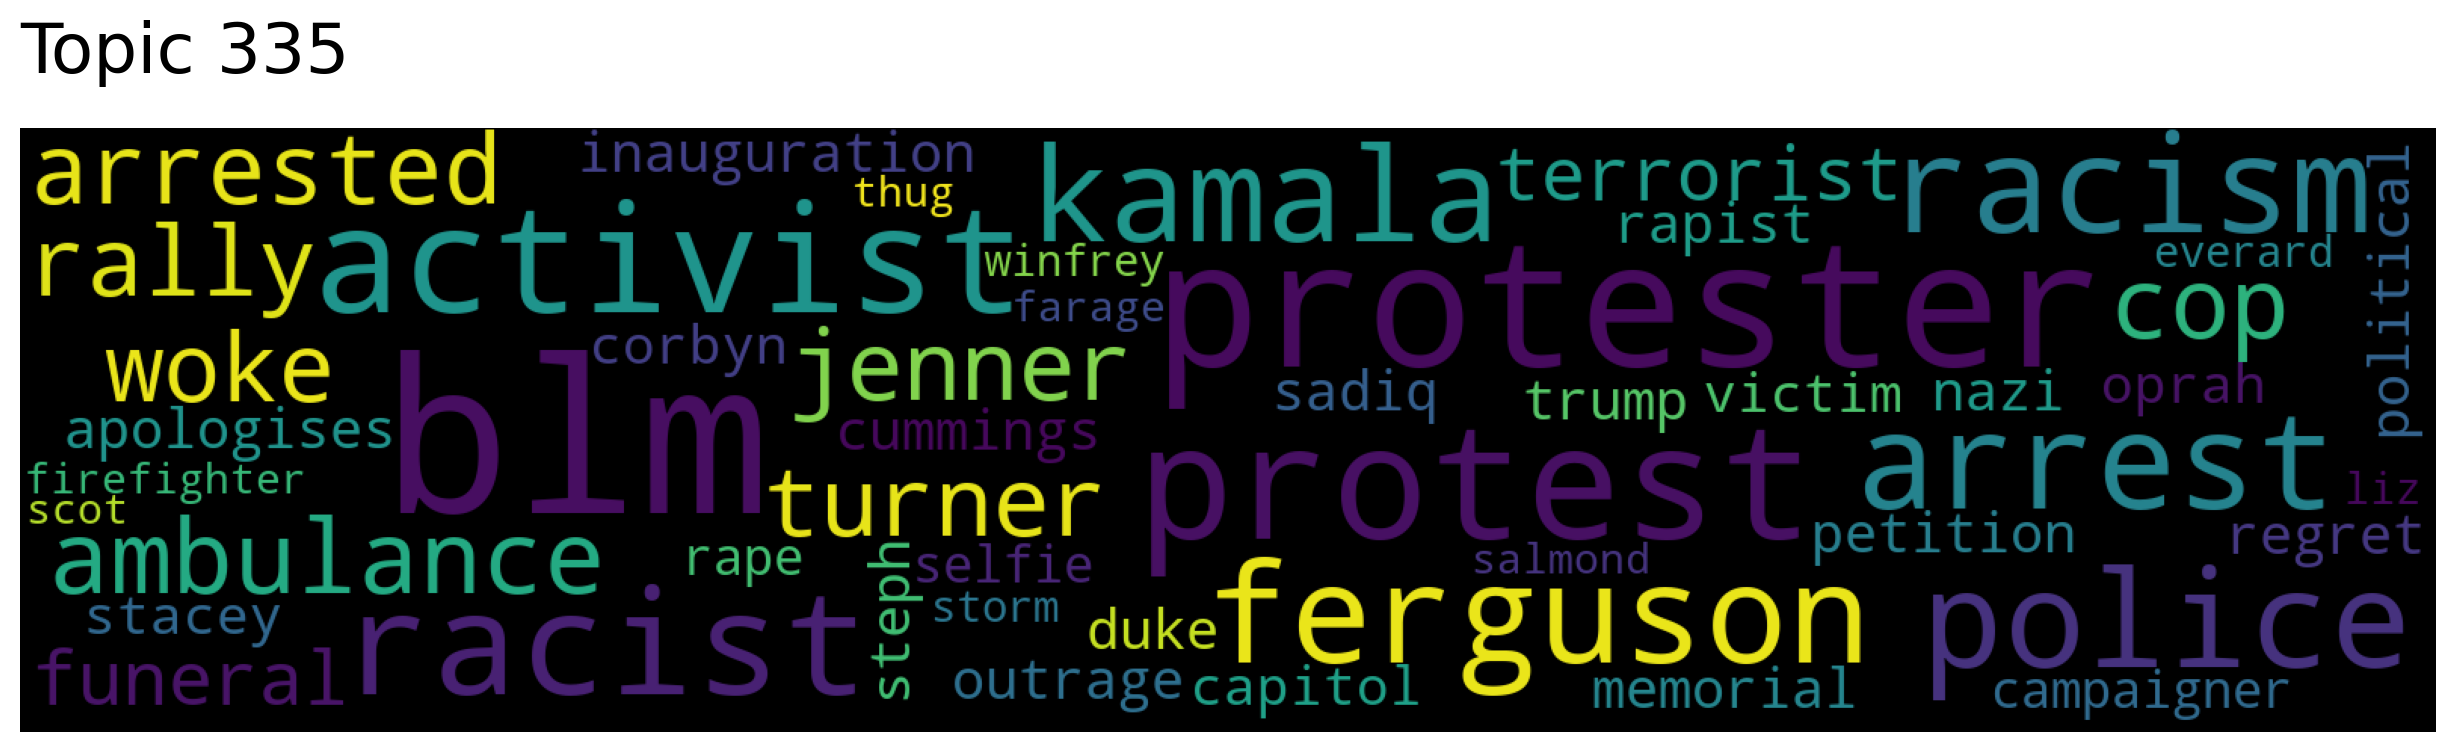

In [27]:
model.generate_topic_wordcloud(topic_num=335)

In [35]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["migrant"], num_topics=5)
topic_nums

array([ 39, 702, 248, 515, 221])

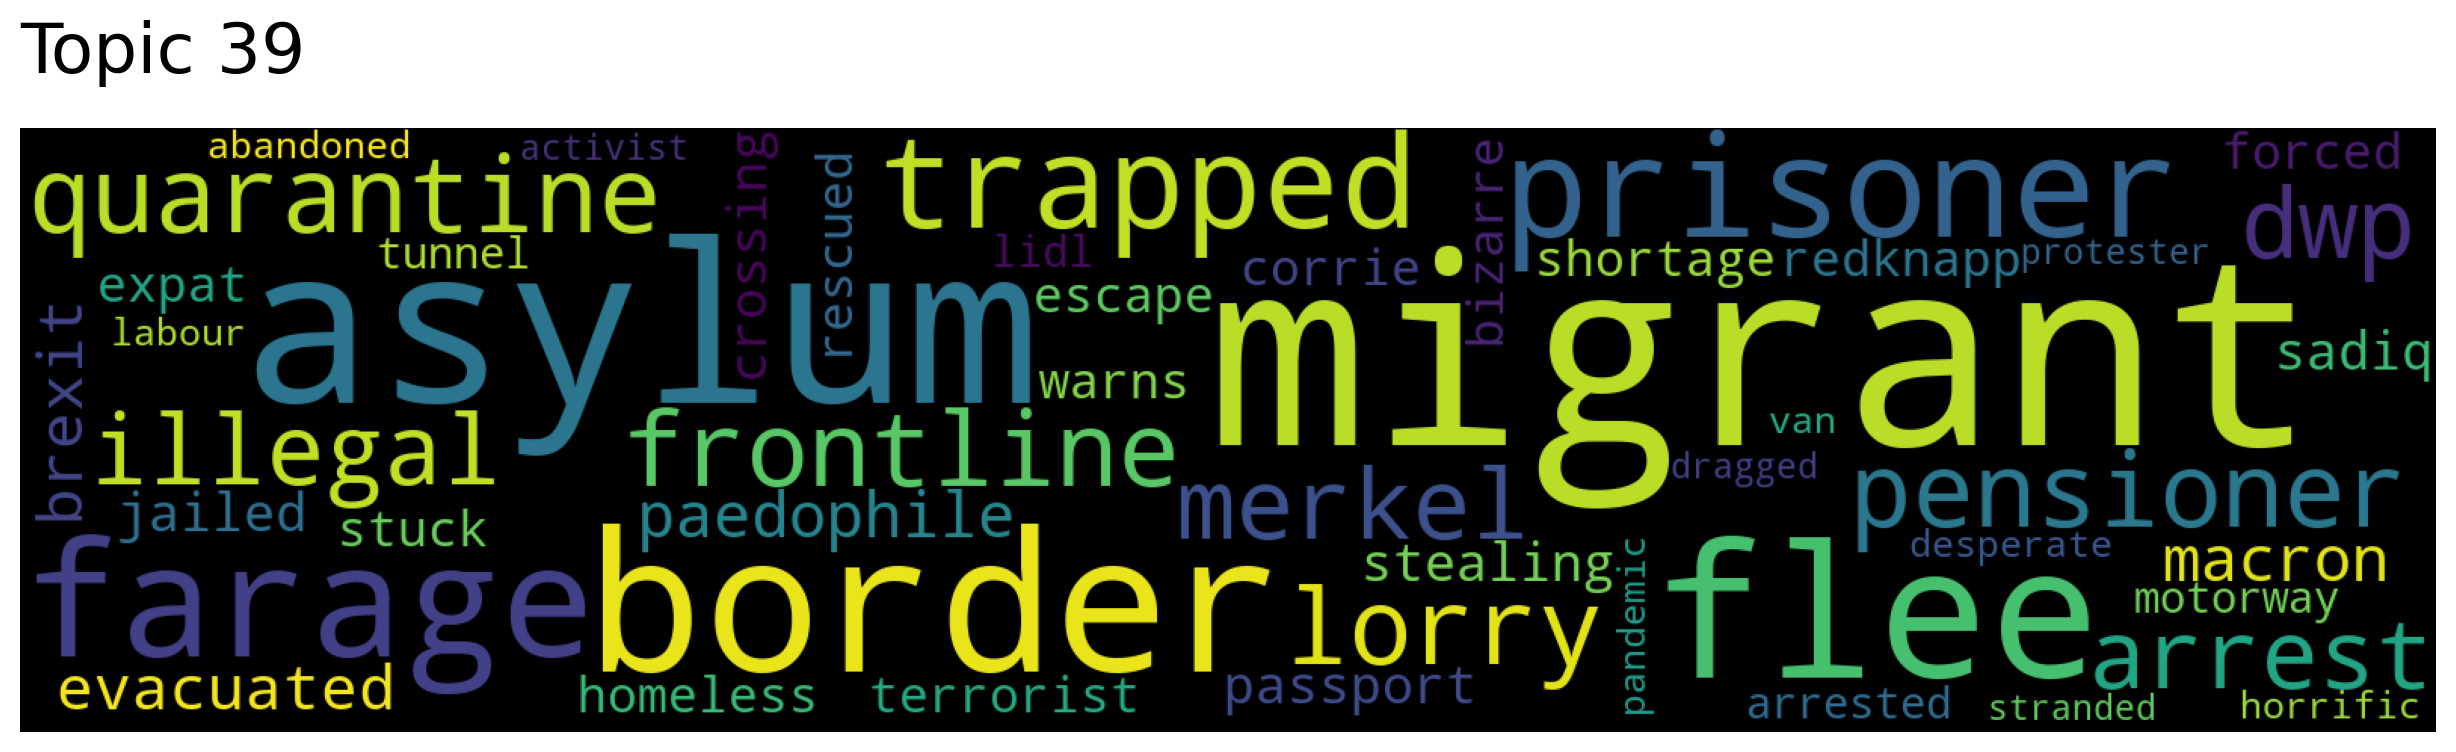

In [38]:
model.generate_topic_wordcloud(topic_num=39)

In [39]:
model.save("2020-21Top2Vec")